# Assignment: 
## Estimate the value of $\pi$
### a possible solution by P. Lind, Oslo August 2020


## Background: How to use a Monte Carlo method for estimating $\pi$

One of the possible "definitions" of $\pi$ is by using the concept of area $A$ and radius $r$ of a circle. Since for every circle $A=\pi r^2$, if we choose the unitary circle ($r=1$) and <i> have a way to estimate </i> $A\sim \tilde{A}$ then we estimate $\pi$ as
\begin{equation}
\tilde{\pi} = \frac{\tilde{A}}{r^2} \, .
\end{equation}
  
To estimate $A$, we will plot points randomly over a square, centered in the origin and with side equal to $2$. The unitary circle is then just inscribed in the square. Since
\begin{equation}
\frac{A(\hbox{circle})}{A(\hbox{square})} = \frac{\pi}{4} \sim \frac{\hbox{# points in circle}}{\hbox{# points in square}} \, ,
\end{equation}
we estimate $\pi$ as
\begin{equation}
\tilde{\pi} = 4 \frac{\hbox{# points in circle}}{\hbox{# points in square}} \, .
\end{equation}

## 1. Compute the value of $\pi$ using a Monte Carlo method.

In [1]:
import numpy as np
import scipy.special as scsp
import random
import matplotlib.pyplot as pl

Choose accuracy:

In [2]:
ipl = 3
threshold = 10**(-ipl)

Initialization:

In [3]:
difference = 4.0  #>pi
yes = 0.
count = 0.

Start Monte Carlo:

In [4]:
while(difference>threshold):
    xx = random.uniform(0.,1.)
    yy = random.uniform(0.,1.)
    if(xx*xx+yy*yy<1):
        yes += 1.
    count += 1.
    #ourpi = 4.*np.float64(yes)/np.float64(count)
    ourpi = np.float64(4.)*np.float64(yes)/np.float64(count)
    #print(ourpi)
    difference = abs(ourpi-np.pi)

Print out result:

In [5]:
print("The estimate of pi is %.10f" % (np.float64(ourpi)))

The estimate of pi is 3.1407407407


## 2. How many random values do you need for achieving a precision up to the $n$th decimal place? Plot your result.

Repeat 1. but now in a for loop, save each result as arrays and print out results

In [6]:
xxval = []
yyval = []
for ipl in range(1,10):
    threshold = 10**(-ipl)
    difference=4.0
    yes = 0.
    count = 0.
    while(difference>threshold):
        xx = random.uniform(0.,1.)
        yy = random.uniform(0.,1.)
        if(xx*xx+yy*yy<1):
            yes += 1.
        count += 1.
        #ourpi = 4.*np.float64(yes)/np.float64(count)
        ourpi = np.float64(4.)*np.float64(yes)/np.float64(count)
        #print(ourpi)
        difference = abs(ourpi-np.pi)
    print("With threshold of %.10f we have pi = %.10f" % (np.float64(threshold),np.float64(ourpi)))
    xxval.append(np.float64(ipl))
    yyval.append(np.float64(count))

With threshold of 0.1000000000 we have pi = 3.1111111111
With threshold of 0.0100000000 we have pi = 3.1428571429
With threshold of 0.0010000000 we have pi = 3.1411042945
With threshold of 0.0001000000 we have pi = 3.1415094340
With threshold of 0.0000100000 we have pi = 3.1416007036
With threshold of 0.0000010000 we have pi = 3.1415918164
With threshold of 0.0000001000 we have pi = 3.1415926633
With threshold of 0.0000000100 we have pi = 3.1415926578
With threshold of 0.0000000010 we have pi = 3.1415926537


Plot result

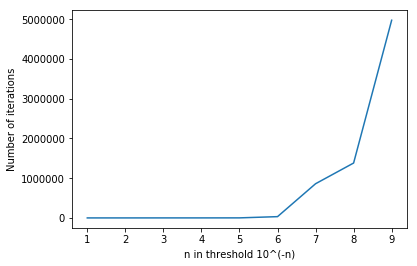

In [7]:
pl.plot(xxval,yyval)
pl.xlabel("n in threshold 10^(-n)")
pl.ylabel("Number of iterations")
pl.show()